In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import Table2x2

In [15]:
file_path = 'Lab/Unit 5 - Day2/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [16]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df = df[df.columns[df.isnull().mean() < 0.8]]

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

1. Crosstab Analysis:

* Create a crosstab between the product category and the isBestSeller status.

In [17]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


* Are there categories where being a best-seller is more prevalent? Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

2. Statistical Tests:

* Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [20]:
chi2_stat, p_val, dof, ex = chi2_contingency(crosstab_result)
print(f"\nChi-cuadrado estadístico: {chi2_stat}")
print(f"p-valor: {p_val}")


Chi-cuadrado estadístico: 36540.20270061387
p-valor: 0.0


* Compute Cramér's V to understand the strength of association between best-seller status and category.

In [22]:
n = crosstab_result.sum().sum()
min_dim = min(crosstab_result.shape) - 1
cramers_v = np.sqrt((chi2_stat / n) / min_dim)
print(f"V de Cramér: {cramers_v}")

V de Cramér: 0.1222829439760564


3. Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Figure size 1200x800 with 0 Axes>

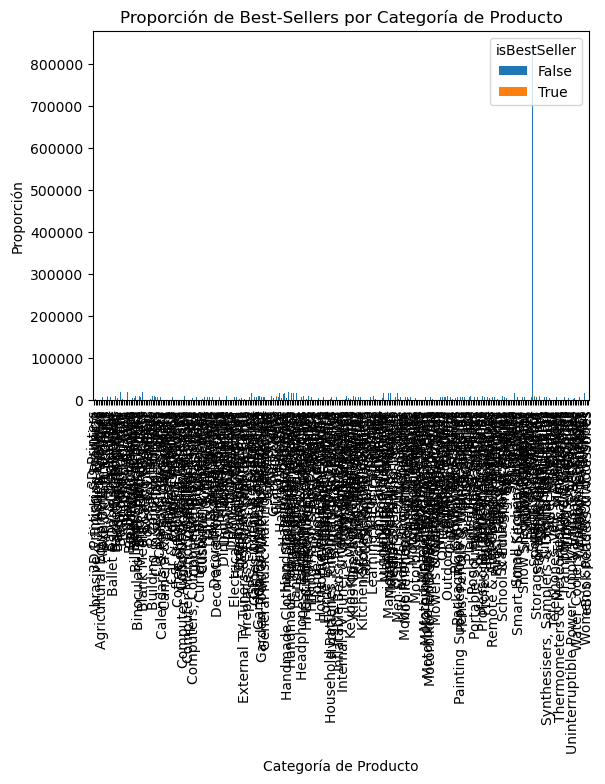

In [18]:
plt.figure(figsize=(12, 8))
crosstab_result.plot(kind='bar', stacked=True)
plt.title('Proporción de Best-Sellers por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Proporción')
plt.legend(title='isBestSeller', loc='upper right')
plt.xticks(rotation=90)
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

0. Preliminary Step: Remove outliers in product prices. For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [24]:
# Calcular el IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Remover outliers
df_no_outliers = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
df_no_outliers


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

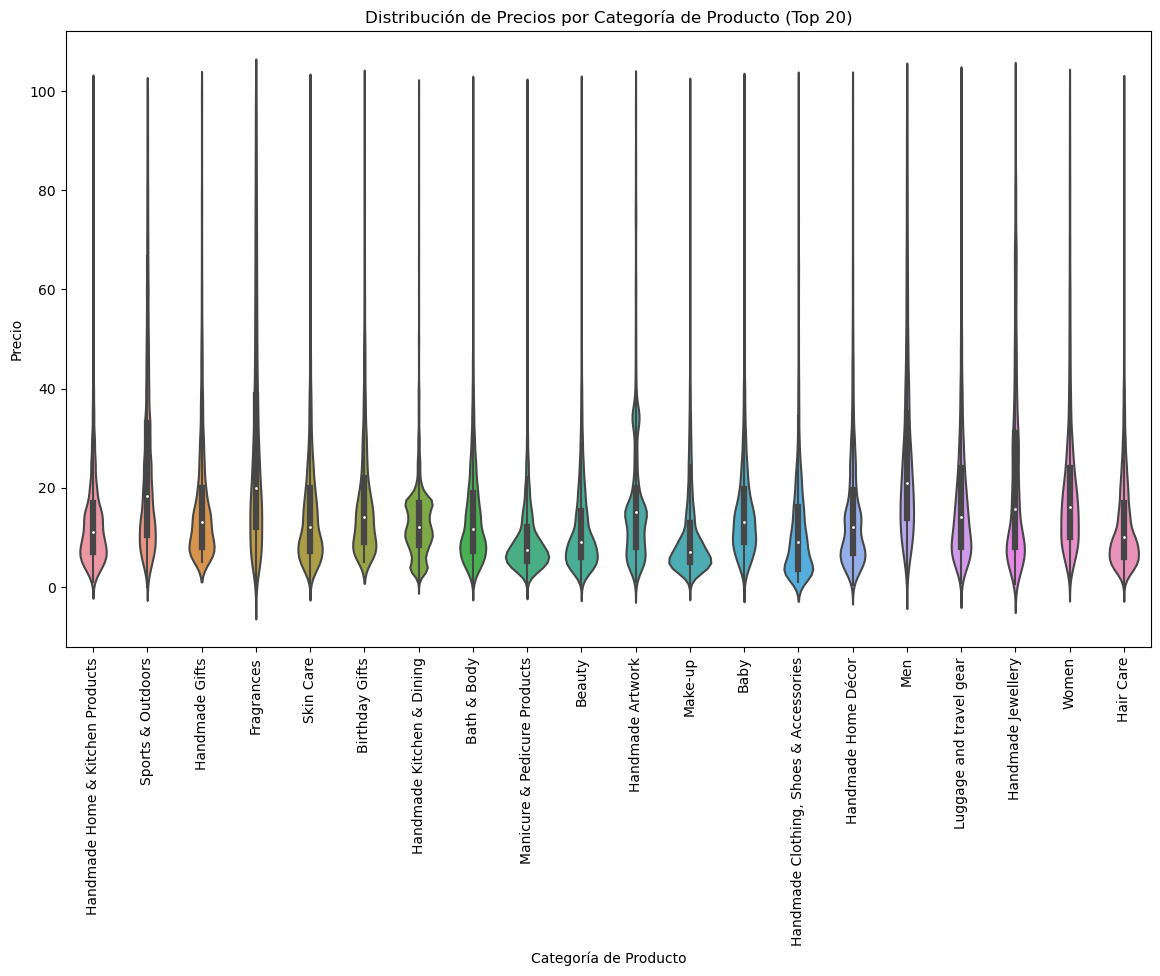

In [25]:
# Filtrar las 20 principales categorías por conteo
top_20_categories = df_no_outliers['category'].value_counts().index[:20]
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Violin Plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_20, x='category', y='price')
plt.title('Distribución de Precios por Categoría de Producto (Top 20)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

2. Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

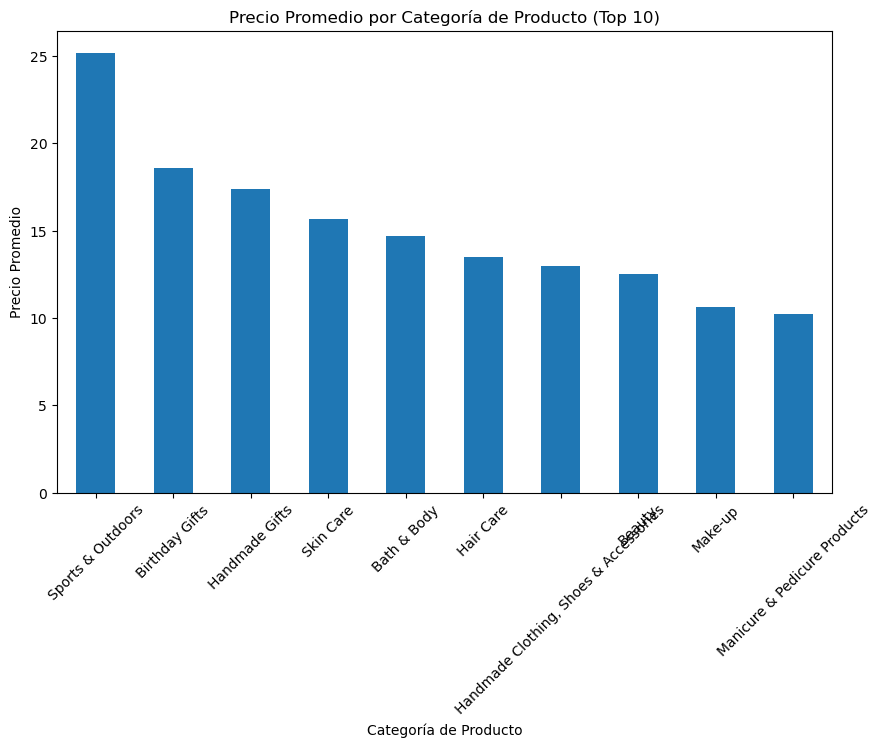

In [26]:
# Filtrar las 10 principales categorías por conteo
top_10_categories = df_no_outliers['category'].value_counts().index[:10]
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Bar Chart
avg_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar')
plt.title('Precio Promedio por Categoría de Producto (Top 10)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()


3. Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

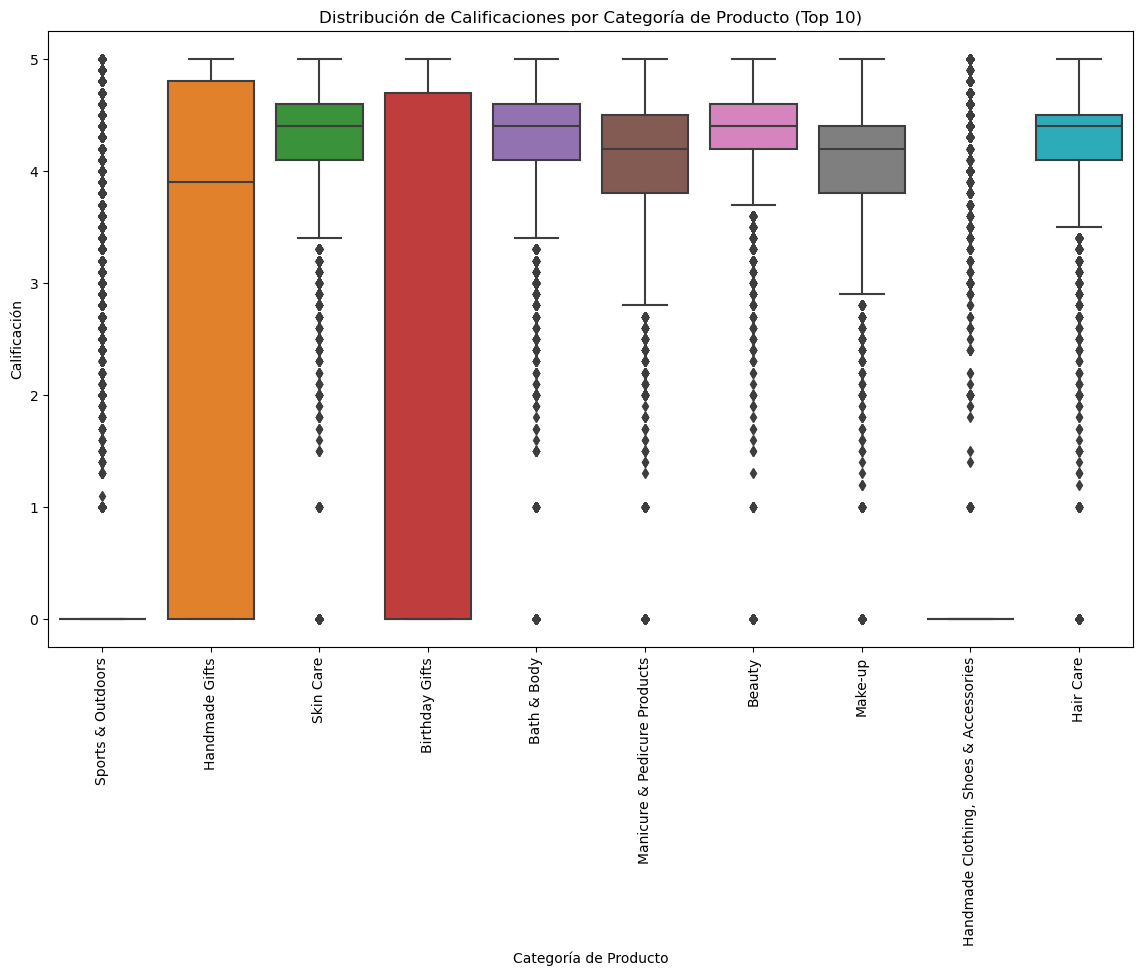

In [28]:
# Box Plot de calificaciones por categoría
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_10, x='category', y='stars')
plt.title('Distribución de Calificaciones por Categoría de Producto (Top 10)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Calificación')
plt.xticks(rotation=90)
plt.show()

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

1. Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?


In [31]:
# Calcular el coeficiente de correlación
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"\nCoeficiente de correlación entre precio y calificación es: {correlation}")


Coeficiente de correlación entre precio y calificación es: -0.07767299878181362


2. Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

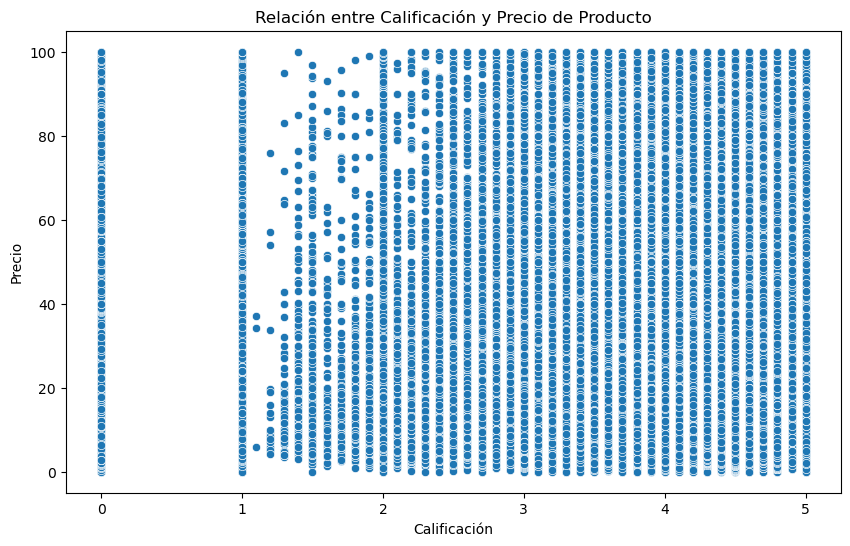

In [32]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='stars', y='price')
plt.title('Relación entre Calificación y Precio de Producto')
plt.xlabel('Calificación')
plt.ylabel('Precio')
plt.show()

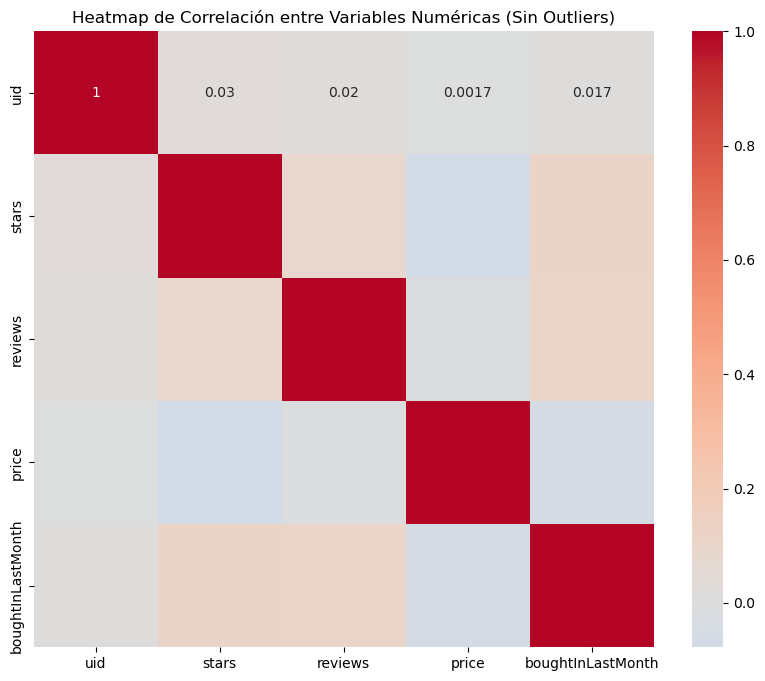

In [41]:
# Eliminar outliers 
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
df_numerical_no_outliers = df_no_outliers.select_dtypes(include=['number'])
df_numerical_no_outliers = df_numerical_no_outliers.dropna()

# Correlation Heatmap sin outliers
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical_no_outliers.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlación entre Variables Numéricas (Sin Outliers)')
plt.show()



<Figure size 1000x600 with 0 Axes>

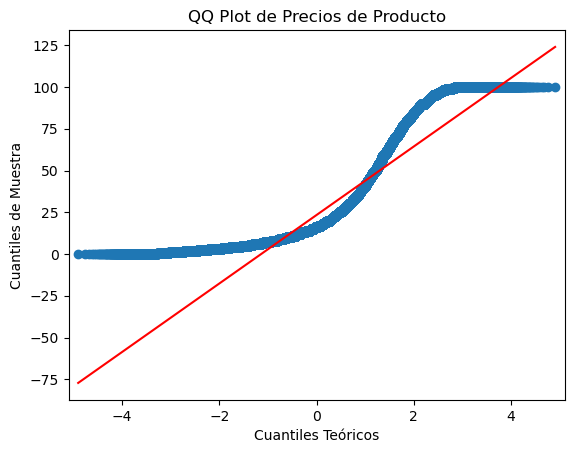

In [34]:
import statsmodels.api as sm

# QQ Plot
plt.figure(figsize=(10, 6))
sm.qqplot(df_no_outliers['price'], line='s')
plt.title('QQ Plot de Precios de Producto')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Muestra')
plt.show()


Bonus:

Do the same analysis without taking out the outliers. What are your insights?

<Figure size 1000x600 with 0 Axes>

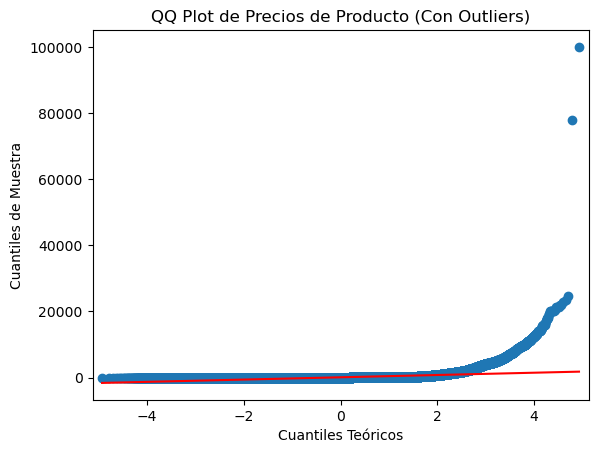

In [37]:
# QQ Plot sin eliminar outliers
plt.figure(figsize=(10, 6))
sm.qqplot(df['price'], line='s')
plt.title('QQ Plot de Precios de Producto (Con Outliers)')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Muestra')
plt.show()